# House Price Prediction

# Problem Statement and Wayforward
### 1. Predicting the district's median housing price, which will be fed into another ML system along with many other signals.
### 2. The predictions are currently estimated manually by experts by using complex rules.
### 3. This manual process is costly and time consuming and the estimates are not great.
### 4. Hence management suggested to go ahead with ML approach.

# Dataset
1. We will use the California Housing Prices dataset from the StatLib repository.
2. This dataset is based on 1990 California census.
3. Data link: "https://github.com/ageron/handson-ml2"


# Let us findout the frame of the Problem
* 1. Since we are going to predict a value like Housing Price, it is a typical regression task.
* 2. Moreover it is a multiple regression problem since our model will use multiple features for prediction.
* 3. As we are trying to predict a single value , hence is a univariate regression task.
* 4. Since there is no continious flow of data coming into model, hence a simple batch learning should be fine, here.

In [1]:
# 

In [2]:
import os
import tarfile
import urllib

# Download the data

In [3]:
download_root="http://raw.githubusercontent.com/ageron/handson-ml2/master/"

housing_url=download_root+"datasets/housing/housing.tgz"
housing_path=os.path.join("datasets1","housing1")

In [4]:
pwd()

'C:\\Full_Stack\\Projects_Imp'

In [5]:

def fetch_housing_data(housing_url,housing_path):
    os.makedirs(housing_path,exist_ok=True)
    tgz_path=os.path.join(housing_path,"housing.tgz")
    urllib.request.urlretrieve(housing_url,tgz_path)
    housing_tgz=tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

### When we call fetch_housing_data(), it creates a datasets/housing directory in our workspace and download the file housing.tgz and extracts all.

In [6]:
fetch_housing_data(housing_url,housing_path)

# Let us load the data by using pandas

In [7]:
import pandas as pd
import numpy as np

In [8]:
housing=pd.read_csv("C:\Full_Stack\Projects_Imp\datasets1\housing1\housing.csv")

In [9]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [10]:
def load_data(housing_path):
    csv_path=os.path.join(housing_path,"housing.csv")
    return pd.read_csv(csv_path)

In [11]:
housing_path

'datasets1\\housing1'

In [12]:
pwd()

'C:\\Full_Stack\\Projects_Imp'

In [13]:
housing=load_data(housing_path)

In [14]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [15]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [16]:
housing.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [17]:
housing.shape[0]

20640

In [18]:
x=10
print(f" the valule of x is {x}")

 the valule of x is 10


In [19]:
print(f"Total number of Districts are {housing.shape[0]}")
print(f"Total number of Attributes are {housing.shape[1]}")

Total number of Districts are 20640
Total number of Attributes are 10


In [20]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [21]:
# Let us find out the categorical information of "ocean_proximity"
housing.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [22]:
# Let us usse describe command 
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Undestanding attributes
* Each row represents one district, There are 20640 districts.
* Each column represents one feature, there are 10 features.
* total_bedrooms, is having lesser number of records (207) we have found from df.info() command. We have to handle these missing values.
* All attributes are float expect ocean_proximity , which is Object and a categorical field.Value_counts function explains (1H Ocean having 9136 records,Inland is 6551,near ocean is having 2658 districts, Near bay having 2290 districts and island 5 districts.
* Describe function explains: 
        1. std: standard deviation i.e. dispersion from mean.,
        2. 25% (first quartile), 50%(2nd quartile(median)),75%(third quartile) represents the percentile: (e.g.housing_median_age, 25% districts have a housing_median_age less than 18, 50% districts are lower than 29 and 75% are lower than 37)
        3. Count: explains how many records we are havinv on that attribute.
        4. mean: average of observation in that attribute.
        5. min: minimum of observation of the attribute.
        6. max: maximum of observation of the attribute.

In [23]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [24]:
print(min(housing['median_house_value']),max(housing['median_house_value']))

14999.0 500001.0


In [25]:
sorted(housing['median_house_value'].unique())

[14999.0,
 17500.0,
 22500.0,
 25000.0,
 26600.0,
 26900.0,
 27500.0,
 28300.0,
 30000.0,
 32500.0,
 32900.0,
 33200.0,
 34200.0,
 34400.0,
 34600.0,
 35000.0,
 36600.0,
 36700.0,
 37500.0,
 37900.0,
 38800.0,
 39200.0,
 39400.0,
 39600.0,
 39800.0,
 40000.0,
 40400.0,
 40900.0,
 41000.0,
 41300.0,
 41400.0,
 41500.0,
 41700.0,
 41800.0,
 42100.0,
 42500.0,
 42600.0,
 42700.0,
 43000.0,
 43100.0,
 43300.0,
 43500.0,
 43600.0,
 43700.0,
 43800.0,
 43900.0,
 44000.0,
 44100.0,
 44400.0,
 44500.0,
 44600.0,
 44700.0,
 44800.0,
 45000.0,
 45100.0,
 45300.0,
 45500.0,
 45600.0,
 45800.0,
 46200.0,
 46300.0,
 46500.0,
 46600.0,
 46700.0,
 46800.0,
 46900.0,
 47000.0,
 47100.0,
 47400.0,
 47500.0,
 47600.0,
 47700.0,
 47800.0,
 47900.0,
 48000.0,
 48100.0,
 48300.0,
 48500.0,
 48600.0,
 48700.0,
 48800.0,
 48900.0,
 49000.0,
 49100.0,
 49200.0,
 49300.0,
 49400.0,
 49500.0,
 49600.0,
 49800.0,
 50000.0,
 50100.0,
 50200.0,
 50300.0,
 50400.0,
 50500.0,
 50600.0,
 50700.0,
 50800.0,
 50900.0,


# Applying histogram to see the type of data we are having.

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt

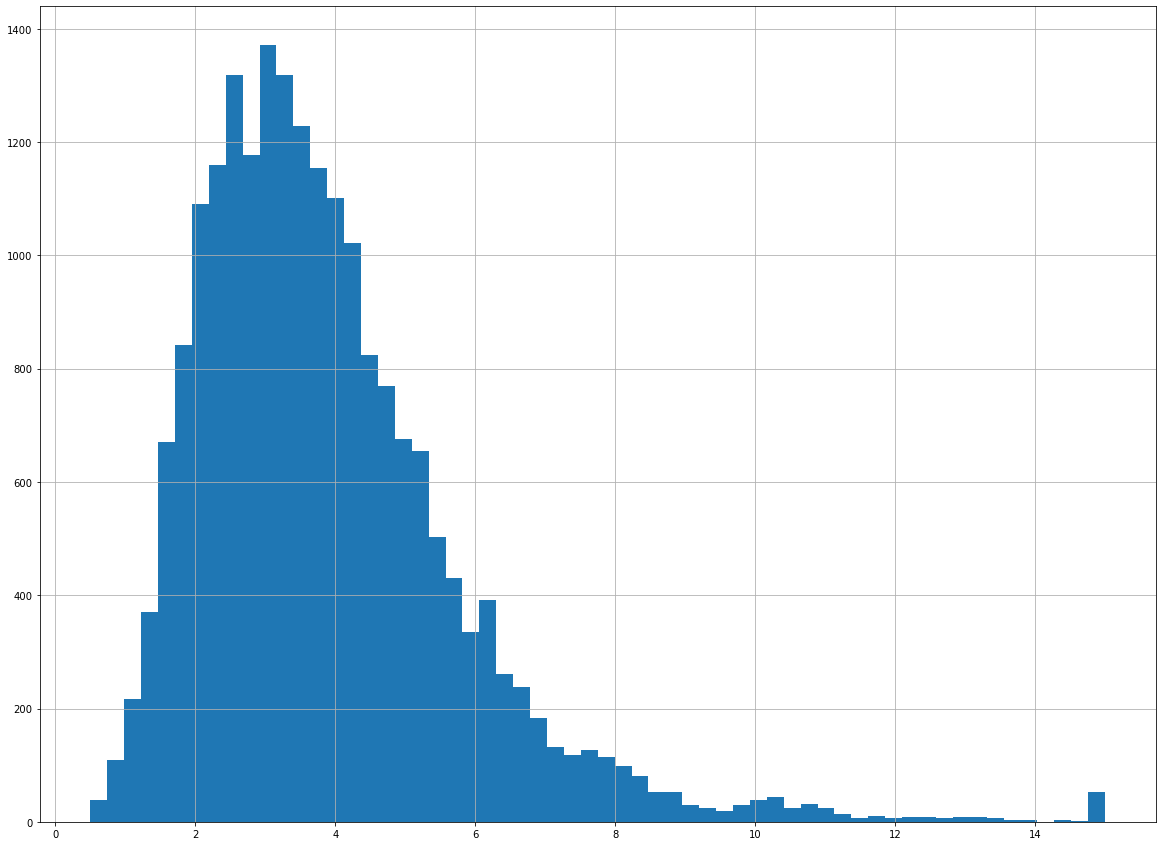

In [27]:
housing['median_income'].hist(bins=60,figsize=(20,15))
plt.show()

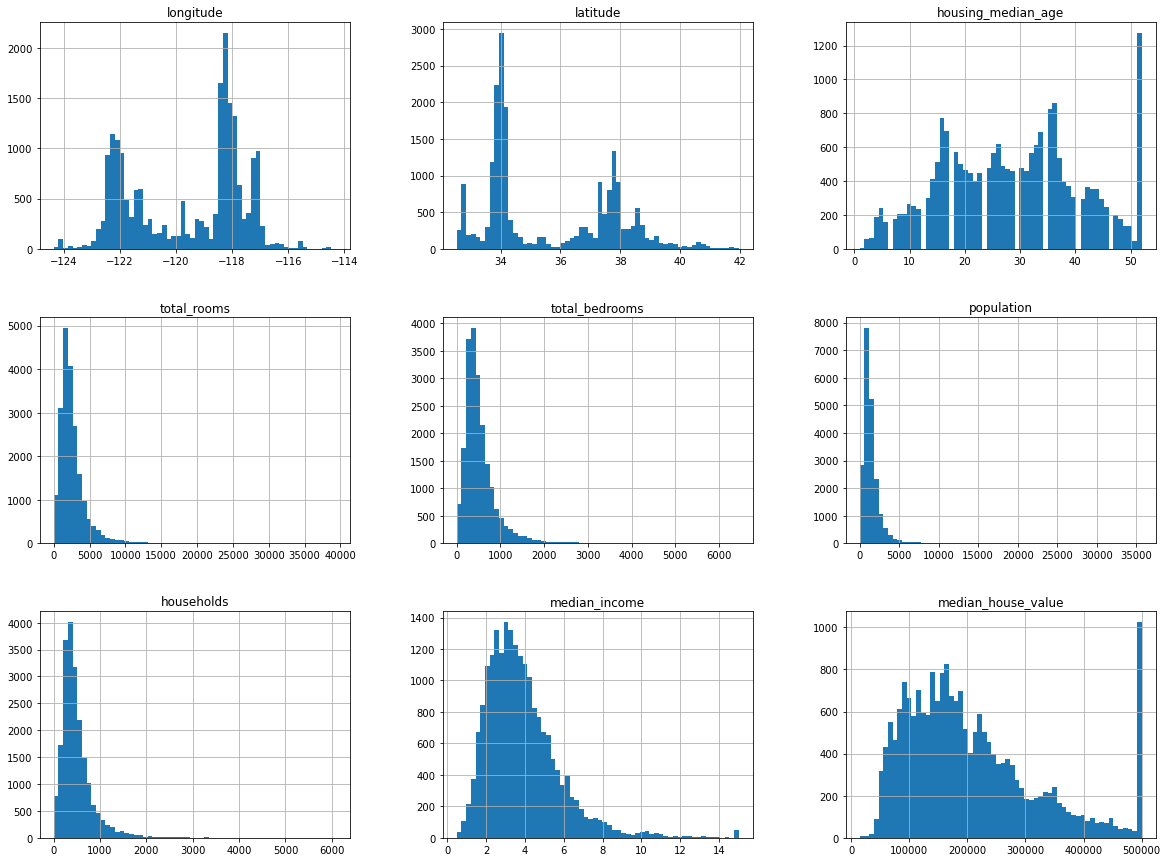

In [28]:
housing.hist(bins=60,figsize=(20,15))
plt.show()

# hist() explains:
    * median_income is not in USD, it is actually tens of thousands of dollars. e.g 3 mean $ 30,000 dollars.
    * median_income is capped at 15 for higher incomes and 0.5 for lower income.
    * Similarly housing_median_age and median_house_value both are capped
    * As our target columnm is median_house_value, which our machine is going to predict, may lean that price never go beyond 50,00000 higher capped value.
    * If we are going to build a ML which need to predict beyond even capping value there there are two options before processing the data.
        a) Collecting proper labels for districts which labels are capped.
        b) Remove those districts from training and test set 
    * We need to do feature_scaling, as all these attributes are in different scales.
    * Most of histograms are right_tailed, so we need to normalize (bell-shaped) the data as this may be a big problem for some ML models to detect the patterns (relationships).

# Sampling and creating training and test sets
### There are two type of sampling 
    1. Random Sampling
    2. Stratified Sampling

* Random Sampling  
This works fine if the dataset is large enough ralative to the number of attributes.
In this case it may be skewed in test set sampling , results would be significantly biased.

from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing,test_size=.2,random_state=42)

* Stratified Sampling
e.g if total population is 1000,and there are 51% belongs to male and 49% belongs to female, 
then the ration of sampling should be apprrox 5100 for male adn 4900 for female.
The whole population is divided into homogenious subgroups called strata.
This helps to guarantee the test set represents the overall population.

Should not have too many strata and each stratum should be large enough to avoid from baising.



In [29]:
housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [30]:
# Creating strata on the basis of income
housing['income_cat']=pd.cut(housing["median_income"],
                             bins=[0.,1.5,3.0,4.5,6.,np.inf],
                             labels=[1,2,3,4,5])


In [31]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


<AxesSubplot:>

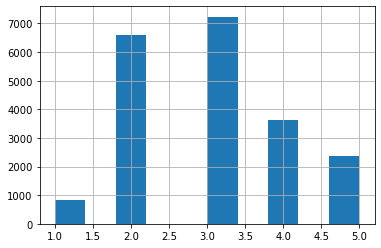

In [32]:
housing['income_cat'].hist()

In [33]:
# Let us do stratified sampling based on income_cat
from sklearn.model_selection import StratifiedShuffleSplit

In [34]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


In [35]:
housing.loc[3]

longitude              -122.25
latitude                 37.85
housing_median_age        52.0
total_rooms             1274.0
total_bedrooms           235.0
population               558.0
households               219.0
median_income           5.6431
median_house_value    341300.0
ocean_proximity       NEAR BAY
income_cat                   4
Name: 3, dtype: object

In [36]:
housing.loc[2]

longitude              -122.24
latitude                 37.85
housing_median_age        52.0
total_rooms             1467.0
total_bedrooms           190.0
population               496.0
households               177.0
median_income           7.2574
median_house_value    352100.0
ocean_proximity       NEAR BAY
income_cat                   5
Name: 2, dtype: object

In [37]:
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=41)
for train_index,test_index in split.split(housing,housing["income_cat"]):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

In [38]:
housing.shape

(20640, 11)

In [39]:
strat_train_set.shape

(16512, 11)

In [40]:
strat_test_set.shape

(4128, 11)

In [41]:
len(strat_test_set)

4128

In [42]:
strat_train_set["income_cat"].value_counts()/len(strat_train_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114402
1    0.039850
Name: income_cat, dtype: float64

In [43]:
# Let us see the income_cat proportions in test_set
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [48]:
strat_test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
15159,-117.05,32.96,18.0,3593.0,661.0,1992.0,626.0,4.8295,165800.0,<1H OCEAN
6733,-118.09,34.12,45.0,2966.0,415.0,1231.0,409.0,7.8347,500001.0,<1H OCEAN
6422,-118.00,34.13,24.0,2584.0,520.0,1869.0,503.0,3.2841,167000.0,INLAND
317,-122.20,37.76,37.0,2680.0,736.0,1925.0,667.0,1.4097,84600.0,NEAR BAY
5385,-118.41,34.03,24.0,3711.0,1192.0,1764.0,1147.0,3.1642,366700.0,<1H OCEAN


In [44]:
strat_test_set.drop("income_cat",axis=1,inplace=True)

In [45]:
strat_train_set.drop("income_cat",axis=1,inplace=True)

In [50]:
print(strat_train_set.shape,strat_test_set.shape)

(16512, 10) (4128, 10)


# Explorative Data Analysis

In [29]:
# Let us explore training dataset separately.
# Let us keep original traning dataset separately before moving for EDA part

In [51]:
housing_train=strat_train_set.copy()

### Visualizing geographical data

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

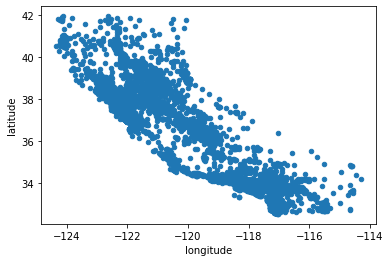

In [52]:
housing_train.plot(kind="scatter",x='longitude',y='latitude')

In [54]:
housing_train.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
11632,-118.03,33.82,20.0,2662.0,464.0,1275.0,472.0,6.0162,318500.0,<1H OCEAN
10673,-117.85,33.62,13.0,5192.0,658.0,1865.0,662.0,15.0001,500001.0,<1H OCEAN


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

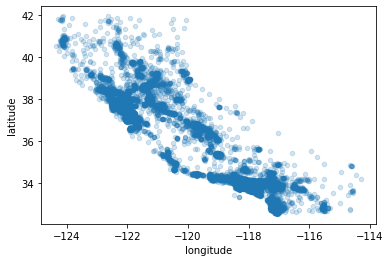

In [55]:
housing_train.plot(kind="scatter",x='longitude',y='latitude',alpha=0.2)

In [33]:
# This helps to visualize the districts of high density areas like Bay areas, around Los Angeeles, San Diego, also density in central valley areas.

### Let us visualize the polulation vs price
    * price represents the colors, using cmap =jet colour map
    * Blue represents low values
    * Red represents high values.
    * Circle represents Population

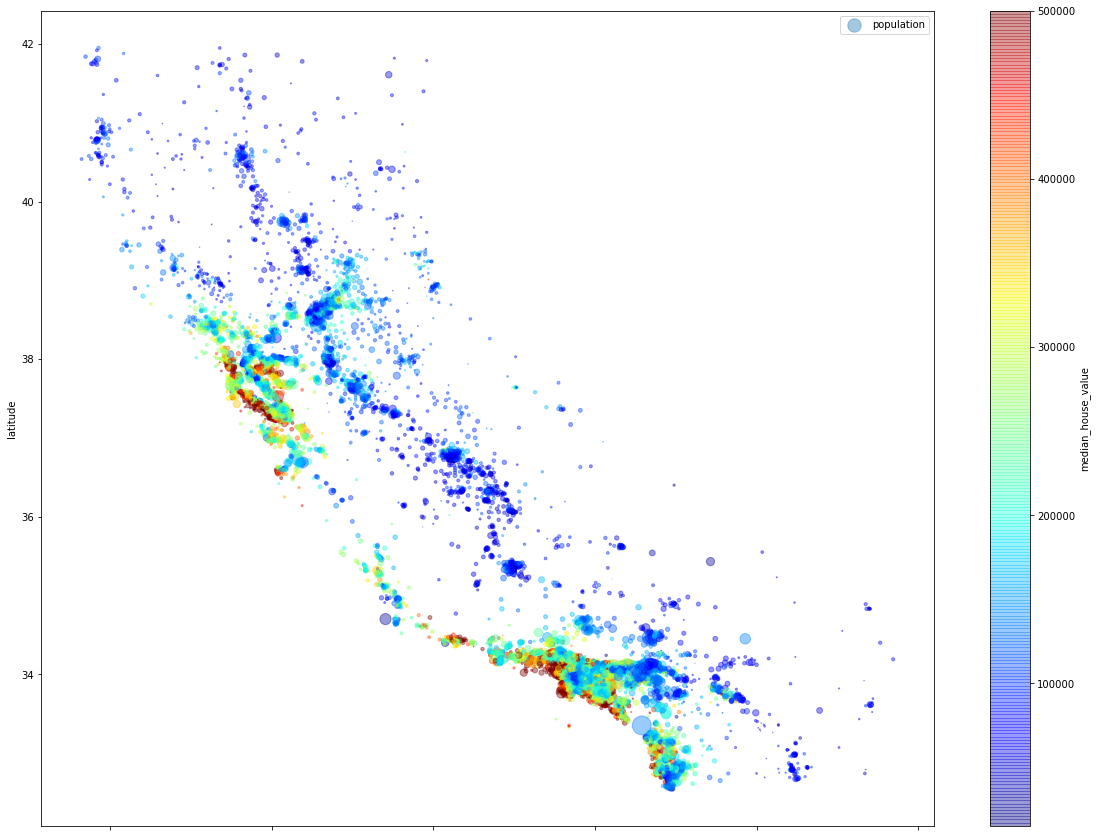

In [57]:
housing_train.plot(kind="scatter",x="longitude",y="latitude",alpha=0.4,
                  s=housing_train["population"]/100,label="population",figsize=(20,15),
                  c="median_house_value",cmap=plt.get_cmap("jet"),colorbar=True)
plt.legend()

### This image represents the Prices are very much related to the density and the location (close to ocean)

In [35]:
housing_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN


In [36]:
# Looking for Co-relation

In [37]:
corr_matrix=housing_train.corr()

In [38]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


In [39]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

### Correlation coefficient (Linear correlation) ranges from -1 to +1.
* When close to 1 means strong +ve correlation e.g. values tends to go up when income goes up.
* latitude is having slightly -ve correlation e.g. values tends to go down when we move towards north.
* Coeffient close to zero means there is no linear correlation.

In [41]:
# Visualizing correlation matrix

In [58]:
from pandas.plotting import scatter_matrix

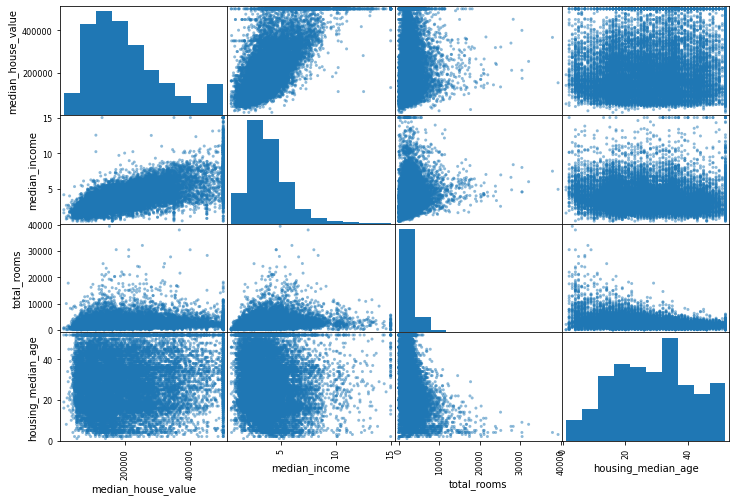

In [62]:
x=['median_house_value','median_income','total_rooms','housing_median_age']
scatter_matrix(housing_train[x],figsize=(12,8))
plt.show()

### The most promising attribute to predict the median house value is hte median income. Let's zoom and analyze

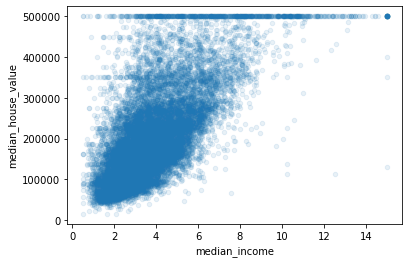

In [44]:
housing_train.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.1)
plt.show()

### Correlation indeed very strong.
    * The price cap cleary visible aa a horizontal line at $5000000, another at $450000, and at $350000
    * Hence few data quirks are there.
    * Some attributes are heavy-tailed distribution.

In [63]:
housing_train.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
11632,-118.03,33.82,20.0,2662.0,464.0,1275.0,472.0,6.0162,318500.0,<1H OCEAN
10673,-117.85,33.62,13.0,5192.0,658.0,1865.0,662.0,15.0001,500001.0,<1H OCEAN


### Rather to understand numbe of rooms in a district, better to know how many households are there (rooms per household)
### similarly rather to understand the no of bedrooms, better to compare with no of rooms.(bedoroms per room)
### Similary population per household.(population per household)
### So let's create new attributes

In [64]:
housing_train["rooms_per_household"]=housing_train["total_rooms"]/housing_train["households"]
housing_train["bedrooms_per_room"]=housing_train["total_bedrooms"]/housing_train["total_rooms"]
housing_train["population_per_household"]=housing_train["population"]/housing_train["households"]

In [65]:
housing_train.shape

(16512, 13)

In [68]:
housing_train.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
11632,-118.03,33.82,20.0,2662.0,464.0,1275.0,472.0,6.0162,318500.0,<1H OCEAN,5.639831,0.174305,2.701271
10673,-117.85,33.62,13.0,5192.0,658.0,1865.0,662.0,15.0001,500001.0,<1H OCEAN,7.842900,0.126733,2.817221
12532,-121.51,38.57,36.0,613.0,166.0,425.0,147.0,2.2031,93800.0,INLAND,4.170068,0.270799,2.891156


In [80]:
housing_train.corr()['median_house_value'].sort_values()

bedrooms_per_room          -0.256628
latitude                   -0.141620
longitude                  -0.049897
population_per_household   -0.032129
population                 -0.024677
total_bedrooms              0.046671
households                  0.063285
housing_median_age          0.111686
total_rooms                 0.131987
rooms_per_household         0.155908
median_income               0.687668
median_house_value          1.000000
Name: median_house_value, dtype: float64

In [74]:
corr_matrix=housing_train.corr()

In [47]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

### Rather than total_rooms, the ration bedrooms_per_room is highely correlated with the house price.
### That means houses having lesser bedrooms/room ratio tends to more expensive.
### rooms_per_household is more correlated than total_rooms in the district that means larger houses, the more they expensive.


# Prepare the dataset for ML Algorithm

In [48]:
# training dtaset
housing_train_x=strat_train_set.drop("median_house_value",axis=1)
housing_train_y=strat_train_set["median_house_value"].copy()

# testing dtaset
housing_test_x=strat_test_set.drop("median_house_value",axis=1)
housing_test_y=strat_test_set["median_house_value"].copy()

### 1. Data Cleaning
* 1.1 (Handling Missing Values)
    * There are three ways
        * get rid of corresponding rows which have null values.
        * get rid of whole attribute that contains null values.
        * set the values to some value (zero,mean,median, etc..)
                * by using fillna
                * by using sklearn SimppleImputer
* 1.2 (Handling Text and Categorical Attributes)
        * OrdinalEncoder
        * OneHotEncoder
* 1.3 Custom Transformers
* 1.4 Feature Scaling.


In [49]:
# As we know "total_bedrooms" is having null values.
# option-1: get rid of corresponding rows which have null values.
# housing_train.dropna(subset=["total_bedrooms"])
# option-2: get rid of whole attribute that contains null values
# housing_train.drop("total_bedrooms",axis=1)
# option-3.a: set the values to some value (zero,mean,median, etc..) fillna
# median=housing_train["total_bedrooms"].median()
# housing_train["total_bedrooms"].fillna(median,inplace=True)


In [50]:
# option-3.b: set the values to some value (zero,mean,median, etc..) Sklearn SimpleImputer

from sklearn.impute import SimpleImputer

imputer=SimpleImputer(strategy="median")

# please note Simpleimputer can be applied to onlyl numerical attributes. so we need to copy of the data without text features

housing_num=housing_train.drop("ocean_proximity",axis=1)
imputer.fit(housing_num)

print(imputer.statistics_)
x=imputer.transform(housing_num) # it is an array

# converting array to dataframe
housing_tr=pd.DataFrame(x,columns=housing_num.columns,index=housing_num.index)



[-1.18510000e+02  3.42600000e+01  2.90000000e+01  2.11950000e+03
  4.33000000e+02  1.16400000e+03  4.08000000e+02  3.54090000e+00
  1.79500000e+05  5.23228423e+00  2.03031374e-01  2.81765270e+00]


In [51]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,4.625369,0.223852,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,6.008850,0.159057,2.707965
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,4.225108,0.241291,2.025974
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,5.232295,0.200866,4.135977
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,4.505810,0.231341,3.047847


In [52]:
# To check whether is there any null values or not
housing_tr.isnull().sum()

longitude                   0
latitude                    0
housing_median_age          0
total_rooms                 0
total_bedrooms              0
population                  0
households                  0
median_income               0
median_house_value          0
rooms_per_household         0
bedrooms_per_room           0
population_per_household    0
dtype: int64

# Handling Text and Categorical Attributes

In [53]:
housing_cat=housing_train[["ocean_proximity"]]

In [54]:
housing_cat.head()

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN


In [55]:
housing_cat.shape

(16512, 1)

In [56]:
# As most of ML models perform to work witht numbers.So let us convert this categorical from text to number.
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder=OrdinalEncoder()
housing_cat_encoded=ordinal_encoder.fit_transform(housing_cat)


In [57]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [58]:
# housing_cat_encoded contains value from 0 to 4

In [59]:
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

### OrdinalEncoder, represents in numerical form starting from 0 to 4 (five categories)
### Issue with this representation, it seems nearby values are more similar that distance values.
### Hence this technique is good for ordinal categorical features like ("bad","good","average","excellence")
## To fix this issue we will use one-hot encoding by creating dummy binary attributes

In [60]:
from sklearn.preprocessing import OneHotEncoder

In [61]:
cat_encoder=OneHotEncoder()
housing_cat_1hot=cat_encoder.fit_transform(housing_cat)

In [62]:
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [63]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [64]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

# Customer Transformers
    * What we have learn to transform the attributes, let us create a custom function

In [65]:
from sklearn.base import BaseEstimator, TransformerMixin

In [66]:
list(housing)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity',
 'income_cat']

In [67]:
rooms_ix,bedrooms_ix,population_ix,households_ix=3,4,5,6 # setting column indexes

class CombineattributeAdder(BaseEstimator,TransformerMixin):
    def __init__(self,add_bedrooms_per_room=True): 
        # by default it will be true,(we can use this hyperparameter to see whether adding this attributes helps our ML model or not)
        self.add_bedrooms_per_room=add_bedrooms_per_room
    def fit(self,x,y=None):
        return self
    def transform(self,x,y=None):
        rooms_per_household=x[:,rooms_ix]/x[:,households_ix]
        population_per_household=x[:,population_ix]/x[:,households_ix]
        if self.add_bedrooms_per_room == True:
            bedrooms_per_room=x[:,bedrooms_ix]/x[:,rooms_ix]
            return np.c_[x,rooms_per_household,population_per_household,bedrooms_per_room]
        #c_ in numpy does horizental concatenation
        else:
            return np.c_[x,rooms_per_household,population_per_household]
attr_adder=CombineattributeAdder(add_bedrooms_per_room=False)
housing_extra_attribute=attr_adder.transform(housing.values)
        
#attr_adder=CombineattributeAdder(add_bedrooms_per_room=True)
#housing_extra_attribute=attr_adder.transform(housing.values)      

In [68]:
print(housing.shape,housing_extra_attribute.shape)

(20640, 11) (20640, 13)


# Feature Scalling

### ML algorithms not perform well if the inpput numerical attributes are not in one scale or they are in different scales.
### In our dataset we have observed that , total number of romms ranges from 6 to 39k while income ranges from 0 to 15
### Scaling of target value is not required.

#### There are two type of scalling:
                * a. MinMaxScaler (rescaled all values and normalized between o and 1)
                * b. standardization
    . MinMaxScaler: subtracting the min value and dividing by the max minus min.( give value between o and 1)
    . Standardization: first it subtracts the mean value and then divies by standard deviation so the distribution 
    has unit variance and will always have zero mean.
        

# Transformation Pipeline

### So we have handled numerical attributes and categorical attributes seprately.
### it is better to have single transformer which can able to handle both, for this puprpose we can use ColumnTransformer of SKLEARN.
### LET US CREATE A PIPELINE FOR NUM ATTRIBUTES TO TRANSFER THE FOLLWOING ACTIVITES.
    * SIMPLEIMPUTER
    * COMBINEATTRIBUTEADDER (CUSTOMIZED ONE)
    * STANDARD SCALLER.
### THEN WE WILL USE COLUMNTRANSFORMER TO HANDLE BOTH NUM AND CATEGORICAL FIELDS (ONEHOT ENCODING)

In [69]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('attribute_adder',CombineattributeAdder(add_bedrooms_per_room=True)),
    ('std_scaler',StandardScaler()),
])

In [70]:
from sklearn.compose import ColumnTransformer
housing_num=housing_train_x.drop("ocean_proximity",axis=1)
num_attributes=list(housing_num)
cat_attributes=["ocean_proximity"]

full_pipeline= ColumnTransformer([
    ("num",num_pipeline,num_attributes),
    ("cat",OneHotEncoder(),cat_attributes),
])

In [71]:
housing_prepared=full_pipeline.fit_transform(housing_train_x)

In [72]:
housing_train_x.shape

(16512, 9)

In [73]:
housing_prepared.shape

(16512, 16)

In [74]:
num_attributes

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [75]:
print(housing_prepared.shape,housing_train_y.shape)

(16512, 16) (16512,)


# Selecting and Training the Model

### Let us try on LinearRegression and find the predictions and measure the losses.

#### LinearRegression

In [76]:
from sklearn.linear_model import LinearRegression

lin_reg=LinearRegression()
lin_reg.fit(housing_prepared,housing_train_y)

LinearRegression()

In [77]:
# Let us try to predict on some instances of train dataset
some_data=housing_train_x.iloc[:5]
some_labels=housing_train_y.iloc[:5]
some_data_prepared=full_pipeline.transform(some_data)
print("predictions",lin_reg.predict(some_data_prepared))
print("actuals",list(some_labels))

predictions [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
actuals [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [78]:
# Let us calculate RMSE

from sklearn.metrics import mean_squared_error
housing_train_predictions_lin=lin_reg.predict(housing_prepared)
lin_mse=mean_squared_error(housing_train_y,housing_train_predictions_lin)
lin_rmse=np.sqrt(lin_mse)
lin_rmse

68628.19819848923

### Linear Regressor is not a good prediciton in training set that means model is underfitting.
### This indicates that the features are not sufficient for good predictions and the model we have used is not a powerful one


#### DicisionTree

In [79]:
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_train_y)

housing_train_predictions_tree=tree_reg.predict(housing_prepared)
tree_mse=mean_squared_error(housing_train_y,housing_train_predictions_tree)
tree_rmse=np.sqrt(tree_mse)
tree_rmse

0.0

### In Decision Tree is n, there is no error.
### This indicates that it's badly overfitted.

# Let us use Cross validation to evaluate both models.
    * if we define cv=10, then it randomly splits the training set into 10 distint folds/subsets.
    * then it trains and evalutes 10 times.
    * by picking a different fold for validation and 9 other folds for training
    * it will give 10 evaluation scores

In [80]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(tree_reg,housing_prepared,housing_train_y,
                       scoring="neg_mean_squared_error",cv=10)
tree_rmse_score=np.sqrt(-scores)

In [81]:
tree_rmse_score

array([67955.67706465, 67430.40603671, 70477.53667006, 69232.85485984,
       70458.03769792, 75551.70247334, 71929.3323942 , 71233.44113433,
       75267.10809131, 69921.08748026])

In [82]:
def display_score(scores):
    print("Scores", scores)
    print("Mean",scores.mean())
    print("Standard Deviation",scores.std())

In [83]:
display_score(tree_rmse_score)

Scores [67955.67706465 67430.40603671 70477.53667006 69232.85485984
 70458.03769792 75551.70247334 71929.3323942  71233.44113433
 75267.10809131 69921.08748026]
Mean 70945.7183902605
Standard Deviation 2582.215014989461


In [84]:
line_score=cross_val_score(lin_reg,housing_prepared,housing_train_y,
                       scoring="neg_mean_squared_error",cv=10)
line_rmse_score=np.sqrt(-line_score)
display_score(line_rmse_score)

Scores [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean 69052.46136345083
Standard Deviation 2731.674001798348


# Findings
### The Decision Tree is overfitting so badly that it performs worse than Linear Regression

# Let us try another model the last one -RandomForestRegression

In [89]:
from sklearn.ensemble import RandomForestRegressor
forest_reg=RandomForestRegressor()
forest_reg.fit(housing_prepared,housing_train_y)

housing_train_predictions_forest=forest_reg.predict(housing_prepared)
forest_mse=mean_squared_error(housing_train_y,housing_train_predictions_forest)
forest_rmse=np.sqrt(forest_mse)
forest_rmse



Scores 18718.08612945796
Mean 18718.08612945796
Standard Deviation 0.0


In [ ]:
# RandomForest with Cross Validation.

In [90]:
forest_scores=cross_val_score(forest_reg,housing_prepared,housing_train_y,
                       scoring="neg_mean_squared_error",cv=10)
forest_rmse_score=np.sqrt(-forest_scores)
display_score(forest_rmse_score)

Scores [49766.20418197 47199.38031706 49963.39117928 52247.75117513
 49591.93278203 53757.29543    48928.83207739 47858.57020338
 53066.45251931 50090.01145202]
Mean 50246.98213175725
Standard Deviation 2043.7709783538041


### It has been observed that with CV, Random Forest peforms very well.
### However noticed that the train score 18718 is much lesser than the validation score 50246.
### This means the model is still overfitting.
### So we need to simplify the model by using regularization technique.


# Fine-Tune the MODEL

### Grid Search

In [93]:
from sklearn.model_selection import GridSearchCV

In [95]:
param_grid=[
    {'n_estimators':[3,10,30],
    'max_features':[2,4,6,8]},
    {'bootstrap':[False],
     'n_estimators':[3,10],
     'max_features':[2,3,4]}
]

forest_reg=RandomForestRegressor()
grid_search=GridSearchCV(forest_reg,param_grid,cv=5,scoring='neg_mean_squared_error',
                        return_train_score=True)

grid_search.fit(housing_prepared,housing_train_y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

### in first evaluation it will run for 3*4=12 combinations of hyper parameters
### in second evaluation it will run for 2*3=6 combinations but this tyme bootstrap= False (bydefault it was true)
### So in total grid_search model will run with a combination of 12+6=18 and it will train for 5 times (cv=5)
### so total there will be 18*5=90 rounds of training.

In [96]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [97]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [98]:
grid_search.cv_results_

{'mean_fit_time': array([0.07755814, 0.25284219, 0.69240141, 0.11293783, 0.36118302,
        1.08458014, 0.15430622, 0.50170679, 1.47875423, 0.19068961,
        0.63204474, 1.87992043, 0.10834064, 0.35918937, 0.14331241,
        0.47592635, 0.17550201, 0.57527256]),
 'std_fit_time': array([0.01037757, 0.01604847, 0.00470645, 0.00433969, 0.00772007,
        0.01395037, 0.00839625, 0.00894354, 0.01672996, 0.00353672,
        0.00615435, 0.0208651 , 0.00264313, 0.00431213, 0.00205119,
        0.0086206 , 0.00393364, 0.00699954]),
 'mean_score_time': array([0.00439835, 0.01219802, 0.03217511, 0.00419855, 0.01119514,
        0.03158717, 0.00440292, 0.01119833, 0.03138385, 0.00419841,
        0.01139426, 0.03197856, 0.00499825, 0.0137979 , 0.00480232,
        0.01319342, 0.00480227, 0.01279449]),
 'std_score_time': array([0.00079966, 0.00193805, 0.00040431, 0.00039971, 0.00039938,
        0.00079662, 0.00048707, 0.00040648, 0.00048951, 0.00039966,
        0.00049008, 0.00089488, 0.00063241, 

In [101]:
cvres=grid_search.cv_results_
for mean_score,params in zip(cvres["mean_test_score"],cvres["params"]):
    print(np.sqrt(-mean_score),params)

64879.17264989888 {'max_features': 2, 'n_estimators': 3}
55865.78785242547 {'max_features': 2, 'n_estimators': 10}
53152.7700924751 {'max_features': 2, 'n_estimators': 30}
60701.22896290698 {'max_features': 4, 'n_estimators': 3}
52491.401519405226 {'max_features': 4, 'n_estimators': 10}
50420.768611179476 {'max_features': 4, 'n_estimators': 30}
59656.123968278705 {'max_features': 6, 'n_estimators': 3}
52914.98671873045 {'max_features': 6, 'n_estimators': 10}
50025.44018158162 {'max_features': 6, 'n_estimators': 30}
59064.373451166364 {'max_features': 8, 'n_estimators': 3}
51500.86680641319 {'max_features': 8, 'n_estimators': 10}
49935.20703733164 {'max_features': 8, 'n_estimators': 30}
61891.55669895651 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54179.43472086146 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59810.67943298976 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52640.111325210826 {'bootstrap': False, 'max_features': 3, 'n_estimators'

### THE BEST RESULT IS 49935.20703733164 {'max_features': 8, 'n_estimators': 30
### our RF model is best AT max_features=8 and n_estimators=30, with rmse result 49935

# Analysing the best model and their errors

In [103]:
feature_importances=grid_search.best_estimator_.feature_importances_

In [104]:
feature_importances

array([6.93870690e-02, 6.48468929e-02, 4.31376569e-02, 1.54785991e-02,
       1.54351730e-02, 1.55779797e-02, 1.49139625e-02, 3.66216910e-01,
       5.40369003e-02, 1.09595122e-01, 6.45193515e-02, 9.16263809e-03,
       1.51936561e-01, 6.30098207e-05, 2.52569796e-03, 3.16647615e-03])

In [112]:
extra_attributes=["rooms_per_hhold","pop_hhold","bedrooms_per_room"]
cat_encoder=full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs=list(cat_encoder.categories_[0])
attributes=num_attributes+extra_attributes+cat_one_hot_attribs

sorted(zip(feature_importances,attributes),reverse=True)

[(0.36621690969525217, 'median_income'),
 (0.15193656091846872, 'INLAND'),
 (0.10959512242098031, 'pop_hhold'),
 (0.06938706901729724, 'longitude'),
 (0.06484689294349523, 'latitude'),
 (0.06451935149439156, 'bedrooms_per_room'),
 (0.054036900295923826, 'rooms_per_hhold'),
 (0.04313765690468382, 'housing_median_age'),
 (0.015577979658579686, 'population'),
 (0.015478599144393408, 'total_rooms'),
 (0.01543517297097088, 'total_bedrooms'),
 (0.014913962512073073, 'households'),
 (0.009162638093151688, '<1H OCEAN'),
 (0.003166476154543551, 'NEAR OCEAN'),
 (0.002525697955105099, 'NEAR BAY'),
 (6.300982068977115e-05, 'ISLAND')]

In [108]:
cat_encoder

OneHotEncoder()

In [109]:
cat_one_hot_attribs

['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']

In [110]:
num_attributes

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [111]:
extra_attributes

['rooms_per_hhold', 'pop_hhold', 'bedrooms_per_room']

### Above list shows the importance of attributes in sorted order

# Let us evaluate the model in Test Set

In [113]:
final_model=grid_search.best_estimator_

### saving the model for future use

In [115]:
import joblib
joblib.dump(final_model,"house_price_prediction.pkl")

['house_price_prediction.pkl']

### loading the model for resue

In [116]:
final_model=joblib.load("house_price_prediction.pkl")

### Testing Dataset

In [117]:
# testing dtaset
housing_test_x=strat_test_set.drop("median_house_value",axis=1)
housing_test_y=strat_test_set["median_house_value"].copy()

In [118]:
x_test_prepared=full_pipeline.transform(housing_test_x)

In [119]:
print(x_test_prepared.shape,housing_test_y.shape)

(4128, 16) (4128,)


In [120]:
final_predictions=final_model.predict(x_test_prepared)

In [121]:
final_mse=mean_squared_error(housing_test_y,final_predictions)
final_rmse=np.sqrt(final_mse)

In [122]:
print(final_rmse)

48404.567712435


### In training the error is 49935 where as in testing it is 48404
### To know  how precise this estimate is let us compute at 95% confidence interval for the generalilzation of model

In [123]:
from scipy import stats
confidence=0.95
squared_errors=(final_predictions-housing_test_y)**2
np.sqrt(stats.t.interval(confidence,len(squared_errors)-1,
                        loc=squared_errors.mean(),
                        scale=stats.sem(squared_errors)))

array([46325.41618525, 50398.01748203])

### With 95% confidence we can estimate range of errors should be in between 46325 to 50398

# Launch,Monitor and Maintain Your Model